In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
data = pd.read_csv('/content/gdrive/My Drive/DataFiles/Image + Non-Image data /cropAndDivideGlcm_2k_NonImage.csv')

In [0]:
# data = data.drop(['Unnamed: 0','index'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)

#in case of first order fts
#data = data.dropna()

#in case of non image features
data['Patient Gender'] = data['Patient Gender'].map(dict(M = 1, F = 0))
data['View Position'] = data['View Position'].map(dict(PA = 1 , AP = 0))
print(data.shape)
data.head()


(112120, 23)


,Image Index,Finding Labels,Patient Age,Patient Gender,View Position,OriginalImagePixelSpacing-x,OriginalImagePixelSpacing-y,Contrast,Homogeneity,Energy,Correlation,Dissimilarity,ASM,Inverse Difference Moment,Variance,Sum Averange,Sum Entropy,Difference Entropy,Inertia,Cluster Shade,Cluster Prominence,Entropy,Maximum Probability
0,00000001_000.png,Cardiomegaly,58,1,1,0.143,0.143,2.543118,0.010693,0.002071,0.000332,0.097431,0.000107,0.010693,12.357621,9.946876,0.015870,0.006862,2.543118,32396.182685,3.292794e+07,0.061342,0.006115
1,00000001_001.png,Cardiomegaly|Emphysema,58,1,1,0.143,0.143,8.470074,0.017990,0.003443,0.001099,0.119116,0.000194,0.017990,10.883437,33.731686,0.044719,0.008452,8.470074,656061.565128,1.323451e+07,0.020361,0.000411
2,00000001_002.png,Cardiomegaly|Effusion,58,1,1,0.168,0.168,4.899603,0.032081,0.000667,0.000888,0.118151,0.000062,0.032081,10.625728,51.348814,0.354858,0.000015,4.899603,441594.491881,6.311953e+07,0.298139,0.011757
3,00000002_000.png,No Finding,81,1,1,0.171,0.171,2.082356,0.007606,0.005060,0.000233,0.087080,0.000369,0.007606,5.462103,28.456553,0.388127,0.001480,2.082356,697807.224418,2.716558e+08,0.236851,0.002255
4,00000003_000.png,Hernia,81,0,1,0.143,0.143,10.670042,0.007358,0.005166,0.001086,0.232431,0.000276,0.007358,13.315258,15.966248,0.024652,0.003924,10.670042,226893.581834,1.305283e+07,0.046570,0.012304


In [0]:
#binarization using Binarizer() ==> threshold = mean of the column
'''
from sklearn.preprocessing import Binarizer
import numpy as np

for c in data.columns[2:18]:
  c_dash = []
  m = np.mean(data[c])
  binar = Binarizer(threshold=m)
  temp = np.reshape(np.array(data[c]), (-1,1))
  c_dash = binar.fit_transform(temp)
  data[c] = c_dash
data.head()
'''

'\nfrom sklearn.preprocessing import Binarizer\nimport numpy as np\n\nfor c in data.columns[2:18]:\n  c_dash = []\n  m = np.mean(data[c])\n  binar = Binarizer(threshold=m)\n  temp = np.reshape(np.array(data[c]), (-1,1))\n  c_dash = binar.fit_transform(temp)\n  data[c] = c_dash\ndata.head()\n'

In [0]:
#'''
def normalize(df):
     result = df.copy()
     for feature_name in df.columns:
         if(feature_name == 'Image Index' or feature_name == 'Finding Labels'):
             continue
         max_value = df[feature_name].max()
         min_value = df[feature_name].min()
         result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
     return result
#'''

In [0]:
data = normalize(data)

In [0]:
data.head()

,Image Index,Finding Labels,Patient Age,Patient Gender,View Position,OriginalImagePixelSpacing-x,OriginalImagePixelSpacing-y,Contrast,Homogeneity,Energy,Correlation,Dissimilarity,ASM,Inverse Difference Moment,Variance,Sum Averange,Sum Entropy,Difference Entropy,Inertia,Cluster Shade,Cluster Prominence,Entropy,Maximum Probability
0,00000001_000.png,Cardiomegaly,0.138015,1.0,1.0,0.334129,0.334129,0.027511,0.059282,0.006936,0.011558,0.084504,0.000987,0.059282,0.107481,0.070747,0.006815,0.495987,0.027511,0.008465,0.021900,0.033419,0.019351
1,00000001_001.png,Cardiomegaly|Emphysema,0.138015,1.0,1.0,0.334129,0.334129,0.091727,0.099848,0.011535,0.038294,0.103340,0.001791,0.099848,0.092483,0.240018,0.019269,0.610923,0.091727,0.171659,0.008791,0.011081,0.001300
2,00000001_002.png,Cardiomegaly|Effusion,0.138015,1.0,1.0,0.632458,0.632458,0.053043,0.178198,0.002228,0.030953,0.102501,0.000575,0.178198,0.089861,0.365395,0.153153,0.000930,0.053043,0.115539,0.041998,0.162491,0.037203
3,00000002_000.png,No Finding,0.193705,1.0,1.0,0.668258,0.668258,0.022519,0.042116,0.016955,0.008088,0.075513,0.003408,0.042116,0.037325,0.202476,0.167515,0.106862,0.022519,0.182582,0.180810,0.129084,0.007136
4,00000003_000.png,Hernia,0.193705,0.0,1.0,0.334129,0.334129,0.115563,0.040738,0.017311,0.037828,0.201769,0.002550,0.040738,0.117225,0.113586,0.010606,0.283552,0.115563,0.059359,0.008671,0.025367,0.038932


In [0]:
data.columns[2:23]

Index(['Patient Age', 'Patient Gender', 'View Position',
       'OriginalImagePixelSpacing-x', 'OriginalImagePixelSpacing-y',
       'Contrast', 'Homogeneity', 'Energy', 'Correlation', 'Dissimilarity',
       'ASM', 'Inverse Difference Moment', 'Variance', 'Sum Averange',
       'Sum Entropy', 'Difference Entropy', 'Inertia', 'Cluster Shade',
       'Cluster Prominence', 'Entropy', 'Maximum Probability'],
      dtype='object')

In [0]:
X = data.values[0:2000, 2:23]
X = X.astype('float64')
Y = data.values[0:2000, 23:38]
Y = Y.astype('int')

In [0]:
X.shape, Y.shape

((2000, 21), (2000, 15))

In [0]:
cols = list(data.columns[23:38])
labels=list()
for i in range(15):
    labels.append(cols[i])
    
print(labels)

['Pleural_Thickening', 'Pneumothorax', 'Edema', 'Pneumonia', 'Hernia', 'Cardiomegaly', 'Infiltration', 'Atelectasis', 'Emphysema', 'Fibrosis', 'Mass', 'No Finding', 'Consolidation', 'Effusion', 'Nodule']


In [0]:
pip install scikit-multilearn

     |████████████████████████████████| 92kB 2.3MB/s 


In [0]:
pip install imblearn

In [0]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, precision_recall_curve, precision_recall_fscore_support
from imblearn.metrics import  sensitivity_specificity_support
import numpy as np
from sklearn.model_selection import KFold
import math

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [0]:
count  = 0
count_pr = 0
count_sens = 0

fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()

result = dict()
result.update({'com_auc_wei':0.0, 'com_auc_mar':0.0, 'avg_prec_mic':0.0, 'avg_prec_mac':0.0, 'avg_prec_wei':0.0})   
result.update({'avg_rec_mic':0.0, 'avg_rec_mac':0.0, 'avg_rec_wei':0.0})  
result.update({"avg_f_mic":0.0, "avg_f_mac":0.0, "avg_f_wei":0.0})
result.update({"sens":0.0, "spec":0.0})

for i in range(15):
  fpr[labels[i]] = []
  tpr[labels[i]] = []
  #roc_auc[labels[i]] = 0.0
  roc_auc[labels[i]] = []
  precision[labels[i]] = []
  recall[labels[i]] = []

In [0]:
from skmultilearn.adapt import MLkNN

no_of_iterations = 1

classifier = MLkNN(k=5)

for i in range(no_of_iterations):
  kf = KFold(n_splits=4, random_state=None, shuffle=False) #Kfold Cross validation
  k = kf.get_n_splits(X)                     # k is the number of folds

  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index] 

  # train
    classifier.fit(X_train, Y_train)
 
  # predict
    predictions = classifier.predict(X_test)

    predictions_arr = predictions.todense()
    # print(type(predictions))
    # print("pred :", predictions)

    # predictions = np.array(predictions)
    predictions = predictions.toarray()
    # print(type(Y))
    # print("shape Y : ",Y_test.shape)
    # print("shape pred : ",predictions.shape)

    # print("Y : ", Y)
    
    
    for i in range(15):
        # fp, tp, _ = roc_curve(Y[:,i], predictions[:,i])
        roc = roc_curve(Y_test[:,i], predictions[:,i])
        # if roc[0][0] != math.nan and roc[1][0] != math.nan:
        #   roc_auc[labels[i]] = roc_auc[labels[i]] + auc(roc[0], roc[1])

        roc_auc[labels[i]].append(auc(roc[0], roc[1]))
        fpr[labels[i]].append(list(roc[0]))
        tpr[labels[i]].append(list(roc[1]))
        
        # pr, re, _ = precision_recall_curve(Y[:, i], predictions[:, i])
        pr_re = precision_recall_curve(Y_test[:, i], predictions[:, i])
        precision[labels[i]].append(list(pr_re[0]))
        recall[labels[i]].append(list(pr_re[1]))


    # predictions = predictions.flatten()
    # Y = Y.flatten()

    flag_w = False
    flag_m = False
    try:
      auc_t = roc_auc_score(Y_test,predictions,average="weighted")
      flag_w = True
      count = count + 1
      auc_m = roc_auc_score(Y_test,predictions,average="macro")
      flag_m = True
    except ValueError:
      pass

    if flag_w:
      result['com_auc_wei'] = result['com_auc_wei'] + auc_t
    if flag_m:
      result['com_auc_mar'] = result['com_auc_mar'] + auc_m
    
    Y_test_flat = Y_test.flatten()
    predictions_flat = predictions_arr.flatten()
    predictions_flat = np.asarray(predictions_flat.tolist()[0])

    flag_prw = False
    try:
      prs_wtd = precision_recall_fscore_support(Y_test_flat, predictions_flat, average='weighted', zero_division=0)
      flag_prw = True
      count_pr = count_pr + 1
    except ValueError:
      pass

    prs_mic = precision_recall_fscore_support(Y_test, predictions, average='micro', zero_division=0)
    prs_mac = precision_recall_fscore_support(Y_test, predictions, average='macro', zero_division=0)

    flag_sens = False
    try:
      sens_spec =  sensitivity_specificity_support(Y_test_flat, predictions_flat, average='weighted')
      flag_sens = True
      count_sens = count_sens + 1
    except ValueError:
      pass

    if flag_sens:
      result['sens'] = result['sens'] + sens_spec[0]
      result['spec'] = result['spec'] + sens_spec[1]

    result['avg_prec_mic'] = result['avg_prec_mic'] + prs_mic[0]
    result['avg_prec_mac'] = result['avg_prec_mac'] + prs_mac[0]
    if flag_prw:
      result['avg_prec_wei'] = result['avg_prec_wei'] + prs_wtd[0]

    result['avg_rec_mic'] = result['avg_rec_mic'] + prs_mic[1]
    result['avg_rec_mac'] = result['avg_rec_mac'] + prs_mac[1]
    if flag_prw:
      result['avg_rec_wei'] = result['avg_rec_wei'] + prs_wtd[1]

    result['avg_f_mic'] = result['avg_f_mic'] + prs_mic[2]
    result['avg_f_mac'] = result['avg_f_mac'] + prs_mac[2]
    if flag_prw:
      result['avg_f_wei'] = result['avg_f_wei'] + prs_wtd[2]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


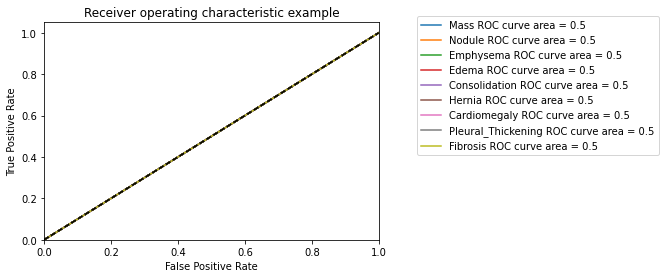

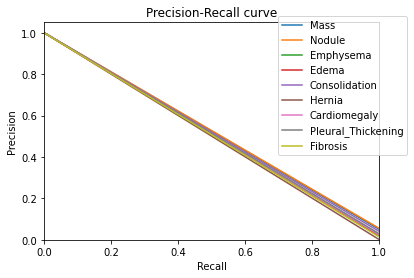

In [0]:
from matplotlib import pyplot as plt

plt.figure()
for i in range(15):
  #print(roc_auc[labels[i]])
  string = labels[i] + ' ROC curve area = ' + str(np.nanmean(roc_auc[labels[i]]))
  f = np.array(fpr[labels[i]], dtype = object)
  t = np.array(tpr[labels[i]], dtype = object)
  if(f.ndim==2 and t.ndim==2):
    plt.plot(np.mean(f, axis=0), np.mean(t, axis=0), label = string)
    #plt.plot(mean_f[i], mean_t[i], label=string)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(bbox_to_anchor = (1.1, 1.05))

plt.show()

plt.figure()

for i in range(15):
  p = np.array(precision[labels[i]], dtype=object)
  r = np.array(recall[labels[i]], dtype=object)
  if p.ndim==2 and r.ndim==2:
    plt.plot(np.mean(r, axis=0), np.mean(p, axis=0), label = labels[i])
    #plt.plot(mean_r[i], mean_p[i], label=string)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve')
    plt.legend(bbox_to_anchor = (1.1, 1.05))
plt.show()

In [0]:
print(count_sens)

4


In [0]:
# k * no_of_iterations)

print("Senstivity: " ,result['sens']/count_sens)
print("Specivity: " ,result['spec']/count_sens)

print("Combined auc (weighted): " ,result['com_auc_wei']/count)
#print("Combined auc (macro): " ,result['com_auc_mar']/count)

# print("Micro averaged precision = ", result['avg_prec_mic']/count_pr)
# print("Macro averaged precision = ", result['avg_prec_mac']/count_pr)
print("Weighted averaged precision = ", result['avg_prec_wei']/count_pr)
    
# print("Micro averaged recall = ", result['avg_rec_mic']/count_pr)
# print("Macro averaged recall = ", result['avg_rec_mac']/count_pr)
print("Weighted averaged recall = ", result['avg_rec_wei']/count_pr)
    
# print("Micro averaged fscore = ", result['avg_f_mic']/count_pr)
# print("Macro averaged fscore = ", result['avg_f_mac']/count_pr)
print("Weighted averaged fscore = ", result['avg_f_wei']/count_pr)

Senstivity:  0.9100333333333332
Specivity:  0.2905872618201202
Combined auc (weighted):  0.505149532647945
Weighted averaged precision =  0.8892151390237177
Weighted averaged recall =  0.9100333333333332
Weighted averaged fscore =  0.8961239834505403


## Using Train test split

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.25)

In [0]:
print(xtrain.shape, ytrain.shape)

(84089, 16) (84089, 15)


In [0]:
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()

In [0]:
from skmultilearn.adapt import MLkNN

classifier = MLkNN(k=5)

classifier.fit(xtrain, ytrain)
 
  # predict
predictions = classifier.predict(xtest)

predictions_arr = predictions.todense()

predictions = predictions.toarray()

for i in range(15):
  roc = roc_curve(ytest[:,i], predictions[:,i])
  roc_auc[labels[i]] = (auc(roc[0], roc[1]))
  fpr[labels[i]] = (list(roc[0]))
  tpr[labels[i]] = (list(roc[1]))

  pr_re = precision_recall_curve(ytest[:, i], predictions[:, i])
  precision[labels[i]] = (list(pr_re[0]))
  recall[labels[i]] = (list(pr_re[1]))

flag_w = False
flag_m = False
try:
  auc_t = roc_auc_score(ytest,predictions,average="weighted")
  print("Weighted auc = ", auc_t)
  flag_w = True
  auc_m = roc_auc_score(ytest,predictions,average="macro")
  print("Macro averaged auc = ", auc_m)
  flag_m = True
except ValueError:
    pass

Y_test_flat = ytest.flatten()
predictions_flat = predictions_arr.flatten()
predictions_flat = np.asarray(predictions_flat.tolist()[0])

flag_prw = False
try:
  prs_wtd = precision_recall_fscore_support(Y_test_flat, predictions_flat, average='weighted', zero_division=0)
  print("Weighted average precision = ", prs_wtd[0])
  print("Weighted average recall = ", prs_wtd[1])
  print("Weighted average fscore = ", prs_wtd[2])
  flag_prw = True
except ValueError:
  pass

    # prs_mic = precision_recall_fscore_support(Y_test, predictions, average='micro', zero_division=0)
    # prs_mac = precision_recall_fscore_support(Y_test, predictions, average='macro', zero_division=0)

flag_sens = False
try:
  sens_spec =  sensitivity_specificity_support(Y_test_flat, predictions_flat, average='weighted')
  print("Weighted average sensitivity = ", sens_spec[0])
  print("Weighted average specificity = ", sens_spec[1])
  flag_sens = True
except ValueError:
  pass


Weighted auc =  0.5209101570123514
Macro averaged auc =  0.5048469671443991
Weighted average precision =  0.9017315447763696
Weighted average recall =  0.9178190034486859
Weighted average fscore =  0.9062998820436763
Weighted average sensitivity =  0.9178190034486859
Weighted average specificity =  0.3406120004317637


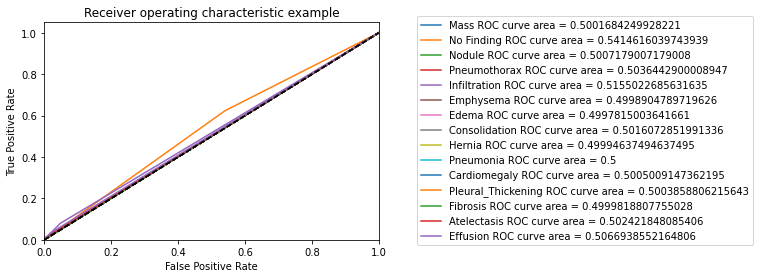

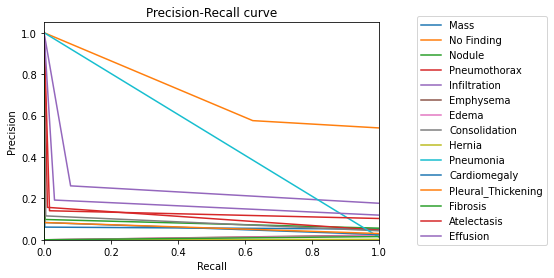

In [0]:
from matplotlib import pyplot as plt

plt.figure()
for i in range(15):
  #print(roc_auc[labels[i]])
  string = labels[i] + ' ROC curve area = ' + str(roc_auc[labels[i]])
  f = fpr[labels[i]]
  t = tpr[labels[i]]
  #if(f.ndim==2 and t.ndim==2):
  plt.plot(f, t, label = string)
  #plt.plot(mean_f[i], mean_t[i], label=string)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(bbox_to_anchor = (1.1, 1.05))

plt.show()

plt.figure()

for i in range(15):
  p = precision[labels[i]]
  r =recall[labels[i]]
  #if p.ndim==2 and r.ndim==2:
  plt.plot(r, p, label = labels[i])
  #plt.plot(mean_r[i], mean_p[i], label=string)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('Precision-Recall curve')
  plt.legend(bbox_to_anchor = (1.1, 1.05))
plt.show()